In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'text.usetex': True,
    'font.family': 'serif',
    'pgf.preamble': '\n'.join([
         r'\usepackage{amsmath}',
    ]),
    'text.latex.preamble': '\n'.join([
         r'\usepackage{amsmath}',
    ])
})

## QAOA and BF-DCQO

In [21]:
simulation_results_qaoa = pd.read_csv("results_ibm/simulation_qaoa.csv")
simulation_results_bfdcqo = pd.read_csv("results_ibm/simulation_bfdcqo.csv")
simulation_results_gurobi = pd.read_csv("results_ibm/simulation_gurobi.csv")
simulation_results_cplex = pd.read_csv("results_ibm/simulation_cplex.csv")

/var/folders/g7/3gdqwhws78797h5zfggq_y7h0000gq/T/ipykernel_22812/2951646698.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


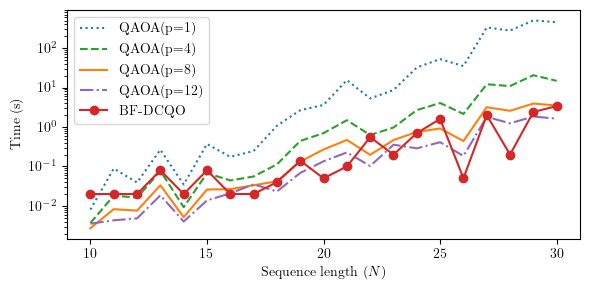

In [25]:
colors = {
    "blue": "#1f77b4",  
    "orange": "#ff7f0e", 
    "green": "#2ca02c",  
    "red": "#d62728",  
    "purple": "#9467bd"  
}

fig = plt.figure(figsize=(6,3), layout='constrained')
axs = fig.subplot_mosaic([['p']], sharex=True, sharey=True)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.1)



axs["p"].plot(simulation_results_qaoa["sequence_length"],
              simulation_results_qaoa["time qaoa (p=1)"],
              ":",
              color=colors["blue"],
              label="QAOA(p=1)")

axs["p"].plot(simulation_results_qaoa["sequence_length"],
              simulation_results_qaoa["time qaoa (p=4)"],
              "--",
              color=colors["green"],
              label="QAOA(p=4)")

axs["p"].plot(simulation_results_qaoa["sequence_length"],
              simulation_results_qaoa["time qaoa (p=8)"],
              "-",
              color=colors["orange"],
              label="QAOA(p=8)")

axs["p"].plot(simulation_results_qaoa["sequence_length"],
              simulation_results_qaoa["time qaoa (p=12)"],
              "-.",
              color=colors["purple"],
              label="QAOA(p=12)")

axs["p"].plot(simulation_results_bfdcqo["sequence_length"],
              simulation_results_bfdcqo["time bfdcqo"],
              "o-",
              color=colors["red"],
              label="BF-DCQO")

axs["p"].legend()

axs["p"].set_xticks([10,15,20,25,30])
axs["p"].set_xticklabels([10,15,20,25,30])


axs["p"].set_yscale("log")
axs["p"].set_ylabel("Time (s)")
axs["p"].set_xlabel(r"Sequence length ($N$)")


plt.tight_layout()
plt.savefig("qaoa_comparison.pdf")
plt.show()

## CPLEX, Brand&Bound and BF-DCQO

/var/folders/g7/3gdqwhws78797h5zfggq_y7h0000gq/T/ipykernel_22812/334106248.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


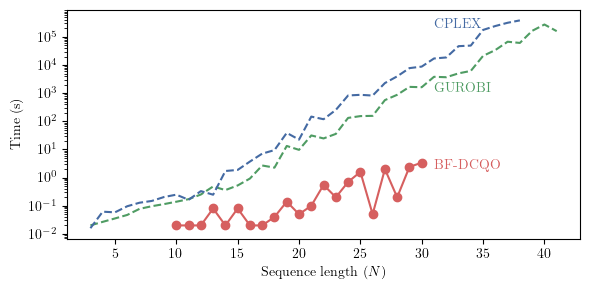

In [24]:
fig = plt.figure(figsize=(6,3), layout='constrained')
axs = fig.subplot_mosaic([['p']], sharex=True, sharey=True)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.1)

red = "#D65F5F"
green = "#4F9C63"
blue = "#446AA3"

axs["p"].plot(simulation_results_gurobi["sequence_length"],
              simulation_results_gurobi["time"],
              "--",
              label="GUROBI",
              color=green)

axs["p"].plot(simulation_results_cplex["sequence_length"],
              simulation_results_cplex["time"],
              "--",
              label="CPLEX",
              color=blue)

axs["p"].plot(simulation_results_bfdcqo["sequence_length"],
              simulation_results_bfdcqo["time bfdcqo"],
              "o-",
              color=red,
              label="BF-DCQO")

axs["p"].text(s="BF-DCQO", x=31, y=2, color=red)
axs["p"].text(s="GUROBI", x=31, y=1e3, color=green)
axs["p"].text(s="CPLEX", x=31, y=2e5, color=blue)


axs["p"].set_xlabel(r"Sequence length ($N$)")
axs["p"].set_yscale("log")
axs["p"].set_ylabel("Time (s)")


plt.tight_layout()
plt.savefig("classical_methods_comparison.pdf")
plt.show()